# Proton Training and Validation Modularized

## Dependencies

In [1]:
# !pip3 install swifter
# !pip3 install xgboost
# !pip3 install tqdm
# !pip3 install category_encoders
# !pip3 install joblib
# !pip3 install scikit-plot
# !pip3 install catboost
# !pip3 install RegscorePy
# !pip3 install -U spacy
# !pip3 install gensim
# !pip3 install xlrd
# !pip3 install lightgbm
# !pip3 install hyperopt
# !pip3 install holidays
# !pip3 install textblob
# !pip3 install pydotplus
# !pip3 install graphviz
# !pip3 install imblearn
# !pip3 install missingpy
# !pip3 install urlextract
# !python -m spacy download en_core_web_sm
# Download en_core_web_sm for text analytics

## Main Function

/Users/thegeorgejoseph/opt/anaconda3/envs/proton/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Enter the path here : datasets/survey_results_public.csv
Attempting to import 100 rows of the dataset
#### RUNNING WAIT ####
extension is csv
We have a csv file
This file has 129 columns and 100 rows

DataFrame Succesfully imported

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)

Enter 'quit' to quit
What would you like to predict? : Salary
Target Spotted!

Enter 'quit' to quit
Enter the Key/Identification Column : 
Key  Not found in the data
Preview can't be shown!!
Do you think you have Successive Targets based on the current target? If yes, enter the column names below 
in this format separated by commas: col1,col2,col3

No Columns removed
Would you like to remove any othe

done ...
		 Replacing empty and invalid strings
done ...
		 Replacing commas if present in Currencies
done ...
		 Finding Numeric Columns
done ...
		   Respondent is of type int64
		   Hobby is of type object
		   OpenSource is of type object
		   Country is of type object
		   Student is of type object
		   Employment is of type object
		   FormalEducation is of type object
		   UndergradMajor is of type object
		   CompanySize is of type object
		   DevType is of type object
		   YearsCoding is of type object
		   YearsCodingProf is of type object
		   JobSatisfaction is of type object
		   CareerSatisfaction is of type object
		   HopeFiveYears is of type object
		   JobSearchStatus is of type object
		   LastNewJob is of type object
		   AssessJob1 is of type float64
		   AssessJob2 is of type float64
		   AssessJob3 is of type float64
		   AssessJob4 is of type float64
		   AssessJob5 is of type float64
		   AssessJob6 is of type float64
		   AssessJob7 is of type float64
		   Ass


Printing Missing % of date columns
                Missing in %
EducationTypes         100.0
Dropping Columns with missing greater than 35% of total number of entries

	 #### RUNNING WAIT ####

Visualizing Coloumns Generated
 {}

The Following columns were generated to get days between dates of two seperate date columns
 []

Date Engineering Time Taken : 0.11240100860595703

	 #### DONE ####
(198, 0)
 #### DONE ####

#### EMAIL ENGINEERING RUNNING WAIT ####
No Email columns found

#### URL ENGINEERING RUNNING WAIT ####
No URL columns found

 ### Entering Segregation Zone ### 


#### Entering Segregation ####

There are 23 pure numeric columns
There are 20 categorical numeric columns

The pure numeric columns are Index(['Respondent', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4',
       'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9',
       'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3',
       'AssessBenefits4', 'AssessBenefits5',

JobSearchStatus is a discrete column!

LanguageDesireNextYear has top 5 levels that contribute to less than 10% of data!
LanguageDesireNextYear is unique

TimeFullyProductive has top 5 levels that contribute to more than 10% of data!
TimeFullyProductive has 6 levels before grouping
TimeFullyProductive is a discrete column!

LastNewJob has top 5 levels that contribute to more than 10% of data!
LastNewJob has 5 levels before grouping
LastNewJob is a discrete column!

AIResponsible has top 5 levels that contribute to more than 10% of data!
AIResponsible has 5 levels before grouping
AIResponsible is a discrete column!

AgreeDisagree3 has top 5 levels that contribute to more than 10% of data!
AgreeDisagree3 has 6 levels before grouping
AgreeDisagree3 is a discrete column!

StackOverflowVisit has top 5 levels that contribute to more than 10% of data!
StackOverflowVisit has 7 levels before grouping
StackOverflowVisit is a discrete column!

OperatingSystem has top 5 levels that contribute to m

  0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
k        0
0    190
1      2
2     18
3     34
4     35
..   ...
117   35
118   89
119   26
120    0
121    3

[122 rows x 1 columns]

thresh2: 19.867469879518072

The final score sheet of 75 selected columns with importances:

                  col_name  scores2   t/f
103         CurrencySymbol      694  True
22         ConvertedSalary      468  True
60                 Country      426  True
62                Currency      273  True
10             AssessJob10      201  True
..                     ...      ...   ...
31   JobContactPriorities4       25  True
106      EthicsResponsible       23  True
8               AssessJob8       23  True
73     FrameworkWorkedWith       22  True
20        AssessBenefits10       21  True

[75 rows x 3 columns]

47 columns are eliminated during Feature Selection which are:
{'JobContactPriorities5', 'Hobby', 'AIDangerous', 'HoursOutside', 'Gender', 'Che

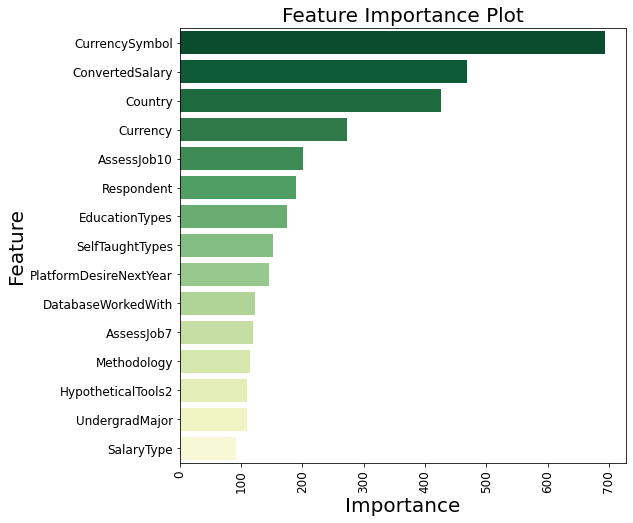

Feature Selection Plot Time taken : 0.3126547336578369
(198, 75)
(198,)

 #### SCALING ####
 #### SCALING DONE ####
(198, 75)
(198,)

 #### POWER TRANSFORMATIONS ####
 #### POWER TRANSFORMATIONS DONE ####
(198, 75)
(198,)

 #### Printing Sample Equation of the DATA ####
LABEL ENCODED FOR SAMPLE EQUATION


LINEAR REGRESSION EQUATION:


Predicted value = 156350.50795954547*AssessJob10 + 327343.51125250274*SalaryType + -50180.9908518779*Country + 645010.6661580489*Currency + -139626.53364919248*StackOverflowParticipate + -117031.27579623827*UpdateCV + -212374.74011928012*CurrencySymbol + -70415.60252965977*RaceEthnicity + 949028.8787047506

R squared = 0.49
(The closer R squared is to 1, the better the model is)

Where the columns are encoded like this:

+------------------------------------------------------------------+--------------------+
| UpdateCV                                                         |   UpdateCV encoded |
|---------------------------------------------------------

Pandas Apply:   0%|          | 0/23 [00:00<?, ?it/s]

Shape after Pearsons Correlation (51, 23)
num_df - (51, 23)
disc_df - (51, 99)
DATE_DF - (0, 0)
TEXT_DF - (0, 0)
LAT_LONG_DF - (0, 0)
EMAIL_DF - (0, 0)
URL_DF - (0, 0)
Applying Target Encoding...
Target Encoding completed
Applying Scaling and Transformations on Validation Set...
Scaling and Transformation completed

This is final shape of X_test : (51, 75)

 #### PRINTING THE LIST OF COLUMNS AND ITS TYPES THAT ENTER THE MODEL TRAINING ####
#### PRINTING X_test ####
Index(['Respondent', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6',
       'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10',
       'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3',
       'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6',
       'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9',
       'AssessBenefits10', 'AssessBenefits11', 'ConvertedSalary',
       'AdsPriorities3', 'AdsPriorities5', 'JobContactPriorities4',
       'JobEmailPriorities4', 'JobEmailPriorities5', 'AdsPriori

<class 'list'>
XGB Validation done
CAT Validation done
LGBM val done
RF Validation done
ET Validation done
linear reg done
ridge reg done
SVC done
this is what you are printing [1 2]
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
Accuracy : 31.19841137598003
Modelling completed
MODEL SAVED

Total Model Training Time taken : 16.68533420562744


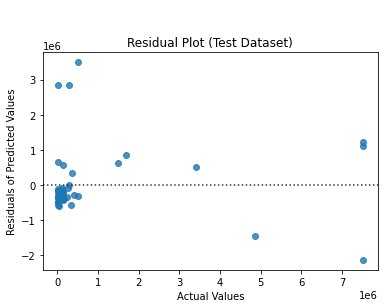

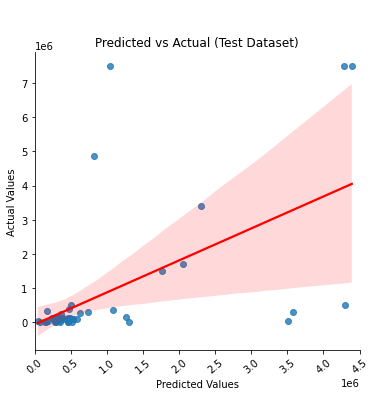


Distribution of Mean of Actual and Predicted Values by Deciles:
+----------+--------------------+-----------------------+
|   Decile |   Actualvalue_mean |   Predictedvalue_mean |
|----------+--------------------+-----------------------|
|        1 |        6.15254e+06 |           2.56848e+06 |
|        2 |   920000           |           1.81852e+06 |
|        3 |   310093           |           1.23877e+06 |
|        4 |   172460           |      504893           |
|        5 |   132240           |      372098           |
|        6 |   112700           |      480997           |
|        7 |    92800           |      406821           |
|        8 |    47950           |      263933           |
|        9 |    25400           |      984657           |
|       10 |    22000           |      270227           |
+----------+--------------------+-----------------------+


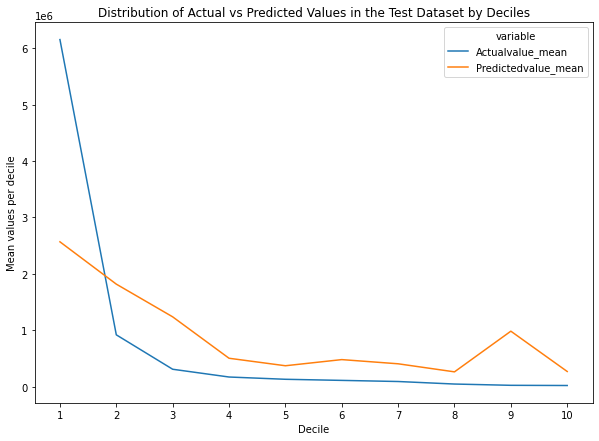

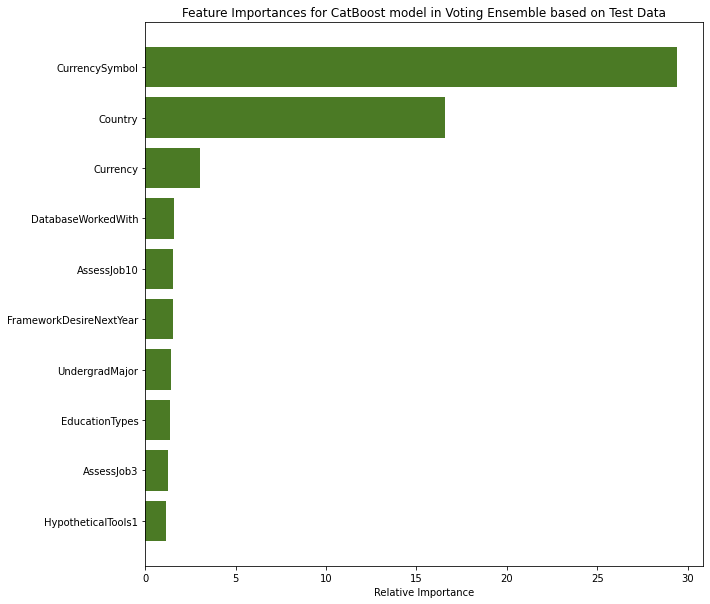

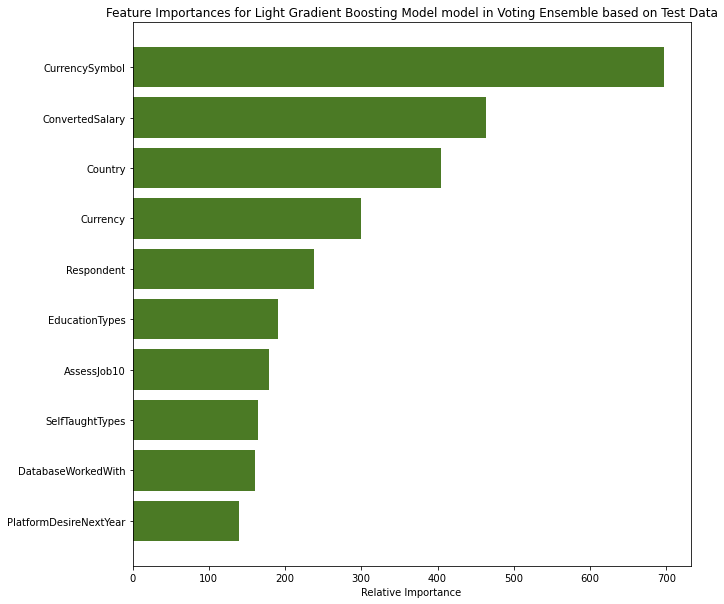


File Saved as preview.csv

Code executed Successfully

############# END ###########

	 #### CODE EXECUTED SUCCESSFULLY ####

	 #### END ####

#### TOTAL TIME TAKEN : 58.61856722831726 ####


In [2]:
from userInputs import *
from INIT import *
from score import *
from all_other_functions import targetAnalysis
import time
import pandas as pd
import numpy as np
import swifter
import joblib
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from engineerings import numeric_engineering
def main():
    '''
    PROTON MAIN FUNCTION
    '''
    spinnerBool = False
    path = input('Enter the path here : ')
    error = False
    if path:
        print("Attempting to import 100 rows of the dataset")
        try:
            df,csvPath = importFile(path,nrows=100)
        except ValueError:
            error_text = "Insufficient Data Error, Please collect more information"
        df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
        df = duplicateHandler(df)
        df,update = dataHandler(df) # If first few rows contains unnecessary info
        df = duplicateHandler(df)
        info = getUserInput(df)
        if not info:
            error = True
    else:
        df = None
        print('\nInitial Import Failed, Quitting Process\n')
        info = None
        error = True

    te = time.time()
    try:
        if info:
            spinnerBool = True
            ################## TRAINING INIT ##################
            if csvPath:
                path = 'SheetSheetSheet.csv'
            df,_ = importFile(path,nrows=None)
            df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
            df = duplicateHandler(df)
            df,update = dataHandler(df,info['target']) 
            df = duplicateHandler(df)
            if update is True: #If columns are removed in dataHandler() 
                cols = df.columns.to_list()
                cols.remove(info['target'])
                info['cols'] = cols
            tts = time.time()
            if isinstance(df,pd.DataFrame):
                target = info['target']
                print("###Performing Initial Numeric Engineering for Capping Purposes###")
#                 print("Initial columns",df.columns.to_list())
                dfsamp = df.sample(n=1000,random_state=1) if len(df)>1000 else df.copy()
                dfsamp = numeric_engineering(dfsamp)
                dfsamp = dfsamp.dropna(axis=0,subset=[target])
                print("###Estimating the type of target for Capping Purposes###")
                class_or_Reg = targetAnalysis(dfsamp[target])                    
                if class_or_Reg == 'Classification':
                    if len(df) >1000000:
                        df_train, _ = train_test_split(df, train_size=1000000,random_state=1, stratify=df[target])
                        print("Dataset size has been capped to 1 million rows for better performance")
                        print("Length of the dataset is now",len(df_train))
                        init_info,validation = INIT(df_train,info)
                    else:
                        print("Dataset has not been capped")
                        print("Length of the dataset is same as original",len(df))
                        init_info,validation = INIT(df,info)
                elif class_or_Reg == 'Regression':
                    dfr = df.sample(n=1000000, random_state=1) if len(df)>1000000 else df.copy()
                    print("Dataset size has been capped to 1 million rows for better performance")
                    print("Length of the dataset is now",len(dfr))
                    init_info,validation = INIT(dfr,info)
                elif class_or_Reg is None:
                    init_info,validation = None,None
            else:
                init_info,validation = None,None
            tte = time.time()
            print('\n TOTAL TRAINING DATA CLEANING AND PLOTS : {}'.format(tte-tts))
            ################## TRAINING INIT ##################

            if isinstance(validation,pd.DataFrame):
                ################## VALIDATION AND PREDICTION ##################
                score(validation,init_info,validation=True)
                ################## VALIDATION AND PREDICTION ##################
                print('\n\t #### CODE EXECUTED SUCCESSFULLY ####')
                print('\n\t #### END ####')
            else:
                print('\n\t #### CODE DID NOT RUN COMPLETELY ####')
            spinnerBool = False
    except KeyboardInterrupt:
        print('QUITTING!')   
        return None
#     except Exception as e:
#         print('Code did not run completely')
#         print('Code ran into an error')
#         print('The error message received is')
#         print(e)
#         return None
    ee = time.time()
    print('\n#### TOTAL TIME TAKEN : {} ####'.format(ee-te))
    return 1

if __name__ == '__main__':
    # Main Function call
    ret = main()

In [3]:
pre = pd.read_csv('preview.csv')
pre.index = np.arange(1,len(pre)+1)

# Set CSS properties for th elements in dataframe
th_prop = [
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'Black'),
    ('border', '0.5px') ,
    ('border', 'solid black'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_prop = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid black'),
    ('color', 'black'),
    ('font-family', 'arial')
  ]

# Set table styles
styls = [
  dict(selector="th", props=th_prop),
  dict(selector="td", props=td_prop),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

# pre.style.set_table_styles(styls).set_caption("Preview of Test Dataset(100 rows) with Predictions and Actual Values")

pre # to display only upto 3 decimal places

,S.No,Actual Values,Predicted Values
1,22378,3400000.0,2301129.476
2,89374,22000.0,143324.415
3,78085,250000.0,368572.784
4,55805,291581.0,734977.550
5,31035,1500000.0,1770425.564
6,76374,22000.0,355707.511
7,19697,45000.0,278984.413
8,78609,7500000.0,1037656.036
9,62953,4862685.0,827991.887
10,2939,112000.0,535210.542


In [4]:
# Set CSS properties for th elements in dataframe
th_props = [
    ('background', 'rgb(12, 64, 90)'),
    ('background', 'linear-gradient(0deg, rgba(21, 112, 157) 0%, rgba(12, 64, 90) 120%)'),
    ('padding', '5px'),
    ('font-family', 'arial'),
    ('font-size', '100%'),
    ('color', 'white'),
    ('border', '0.5px') ,
    ('border', 'solid #0c405a'),
    ('text-align', 'center')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
#     ('background', 'rgb(232, 247, 252)'),
    ('border', '0.5px'),
    ('border','solid #0c405a')    
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props),
  dict(selector="caption", props=[("text-align", "left"),("font-size", "120%"),("color", 'black')])
  ]

def color_func(value):           # setting different color for F1 or RMSE column
    if value.name in ['Weighted F1','RMSE']:
        color= '#f7f7ba'
    else:
#         print(value)
        color= '#e8f7fc'
    return ['background-color: %s' %color]*len(value)


MC = pd.read_csv('MC.csv')
if 'Weighted F1' in MC.columns:          # for setting caption
    cap='This table is sorted by F1 Score(Weighted F1), higher the better'
else:
    cap ='This table is sorted by Root Mean Squared Error(RMSE), lower the better'
MC.index = np.arange(1,len(MC)+1)       # adjusting index
if 'Weighted F1' in MC.columns:        #for setting decimal places
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(3)
else:
    mc= MC.style.set_table_styles(styles).set_caption(cap).apply(color_func, axis=0).set_precision(2)
    
mc

,Machine Learning Model,Accuracy%,RMSE,MSE,MAE,BIC,Total time (hh:mm:ss)
1,Ensemble (CatBoost+Light Gradient Boosting Model),31.20%,1555248.62,2418798258495.20,824883.17,1749.12,00:00:07
2,CatBoost,24.94%,1624420.19,2638740944080.06,956719.79,1753.55,00:00:07
3,Light Gradient Boosting Model,24.94%,1624420.19,2638740944080.06,956719.79,1753.55,00:00:00
4,ExtraTrees Regressor,15.89%,1719622.53,2957101656807.52,809405.23,1759.36,00:00:00
5,Random Forest,6.77%,1810372.76,3277449520377.30,1024614.78,1764.61,00:00:00
6,XGBoost,-4.62%,1917805.30,3677977186045.53,985331.77,1770.49,00:00:01
7,Support Vector Machine,-12.52%,1988924.64,3955821209210.75,726066.66,1774.20,00:00:00
8,Ridge Regression,-13.22%,1995128.50,3980537751534.31,1426372.28,1774.52,00:00:00
9,Linear Regression,-25.47%,2100240.41,4411009762400.72,1524493.21,1779.76,00:00:00


In [5]:
# joblib.load('XT').min().min()


In [6]:
# joblib.load('Xt').min().min()

In [7]:
# joblib.load('XT').max().max()

In [8]:
# joblib.load('Xt').max().max()

In [9]:
# joblib.load('YT').max()

In [10]:
# joblib.load('Yt').max()

In [11]:
# joblib.load('YT').min()

In [12]:
# joblib.load('Yt').min()

In [13]:
# import pandas as pd
# # df = pd.read_csv('SheetSheetSheet.csv')
